In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
data = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

In [3]:
data.shape

(5110, 12)

In [4]:
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [5]:
data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [6]:
data.dropna(inplace=True)
data.isna().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [7]:
data.duplicated()

,0
0,False
2,False
3,False
4,False
5,False
...,...
5104,False
5106,False
5107,False
5108,False


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
df = pd.DataFrame(data)

# Using Label Encoding for binary categories
df["gender"] = df["gender"].map({"Male": 0, "Female": 1})
df["ever_married"] = df["ever_married"].map({"No": 0, "Yes": 1})
df["Residence_type"] = df["Residence_type"].map({"Rural": 0, "Urban": 1})




In [10]:
# Using Label Encoding for multi-category columns and displaying category mappings
label_encoders = {}

for col in ["work_type", "smoking_status"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for future inverse transformation

    # Display category mapping
    category_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"Category Mapping for {col}: {category_mapping}")

Category Mapping for work_type: {'Govt_job': 0, 'Never_worked': 1, 'Private': 2, 'Self-employed': 3, 'children': 4}
Category Mapping for smoking_status: {'Unknown': 0, 'formerly smoked': 1, 'never smoked': 2, 'smokes': 3}


In [11]:
# Compute correlation matrix
correlation = df.corr()

# Get correlation with target variable 'stroke'
corr_with_target = correlation["stroke"].drop("stroke")

# Print sorted correlation values
print(corr_with_target.sort_values(ascending=False))

age                  0.232331
hypertension         0.142515
avg_glucose_level    0.138936
heart_disease        0.137938
ever_married         0.105089
smoking_status       0.051558
bmi                  0.042374
Residence_type       0.006031
id                   0.004839
gender              -0.006904
work_type           -0.033756
Name: stroke, dtype: float64


In [12]:
# Drop the 'id' column
dd = df.drop(columns=['id'])

# Display the updated DataFrame
print(dd.head())

   gender   age  hypertension  heart_disease  ever_married  work_type  \
0     0.0  67.0             0              1             1          2   
2     0.0  80.0             0              1             1          2   
3     1.0  49.0             0              0             1          2   
4     1.0  79.0             1              0             1          3   
5     0.0  81.0             0              0             1          2   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               1       1  
2               0             105.92  32.5               2       1  
3               1             171.23  34.4               3       1  
4               0             174.12  24.0               2       1  
5               1             186.21  29.0               1       1  


In [13]:
dd.dropna(inplace=True)
dd.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


In [14]:
X = dd.drop(columns="stroke" , axis=1)
y = dd["stroke"]

In [15]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Initialize variables to track the best model
best_model = None
best_accuracy = 0
best_model_name = ""

## Logistic Regression

* A statistical model used for binary classification.
* It estimates the probability of a class using the sigmoid function.






In [17]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr) * 100
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}%")

# Track the best model
if accuracy_lr > best_accuracy:
    best_accuracy = accuracy_lr
    best_model = model_lr
    best_model_name = "Logistic Regression"


Logistic Regression Accuracy: 94.50%


## Random Forest

* An ensemble learning method that builds multiple decision trees.
* It improves accuracy and reduces overfitting by averaging predictions.


In [18]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100
print(f"Random Forest Accuracy: {accuracy_rf:.2f}%")

# Track the best model
if accuracy_rf > best_accuracy:
    best_accuracy = accuracy_rf
    best_model = model_rf
    best_model_name = "Random Forest"


Random Forest Accuracy: 94.60%


## Gradient Boosting

* A boosting technique that builds models sequentially, correcting previous errors.
* It uses weak learners (decision trees) to enhance performance.

In [19]:
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb) * 100
print(f"Gradient Boosting Accuracy: {accuracy_gb:.2f}%")

# Track the best model
if accuracy_gb > best_accuracy:
    best_accuracy = accuracy_gb
    best_model = model_gb
    best_model_name = "Gradient Boosting"


Gradient Boosting Accuracy: 94.09%


## SVM

* A model that finds the best decision boundary (hyperplane) to separate classes.
* It works well in high-dimensional spaces and can use different kernels.


In [20]:
model_svm = SVC(probability=True)
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm) * 100
print(f"SVM Accuracy: {accuracy_svm:.2f}%")

# Track the best model
if accuracy_svm > best_accuracy:
    best_accuracy = accuracy_svm
    best_model = model_svm
    best_model_name = "SVM"


SVM Accuracy: 94.60%


## Naive Bayes

* A probabilistic classifier based on Bayes' theorem with an assumption of feature independence.
* It is fast and effective for text classification and spam detection.

In [21]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb) * 100
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}%")

# Track the best model
if accuracy_nb > best_accuracy:
    best_accuracy = accuracy_nb
    best_model = model_nb
    best_model_name = "Naive Bayes"


Naive Bayes Accuracy: 87.37%


## Decision Tree

* A tree-like model that splits data based on feature conditions.
* It is simple, interpretable, but prone to overfitting.


In [22]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt) * 100
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}%")

# Track the best model
if accuracy_dt > best_accuracy:
    best_accuracy = accuracy_dt
    best_model = model_dt
    best_model_name = "Decision Tree"


Decision Tree Accuracy: 91.65%


## K-Nearest Neighbors (KNN)

* A non-parametric model that classifies based on the majority vote of K nearest neighbors.
* It works well with small datasets but is sensitive to irrelevant features.


In [23]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn) * 100
print(f"KNN Accuracy: {accuracy_knn:.2f}%")

# Track the best model
if accuracy_knn > best_accuracy:
    best_accuracy = accuracy_knn
    best_model = model_knn
    best_model_name = "KNN"


KNN Accuracy: 93.79%


## XGBoost

* An optimized version of Gradient Boosting that improves speed and performance.
* It is widely used in machine learning competitions for structured data.

In [24]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb) * 100
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}%")

# Track the best model
if accuracy_xgb > best_accuracy:
    best_accuracy = accuracy_xgb
    best_model = model_xgb
    best_model_name = "XGBoost"


XGBoost Accuracy: 94.20%


## Display Best Model

In [25]:
print("\nBest Model:", best_model_name, "with Accuracy:", round(best_accuracy, 2), "%")



Best Model: Random Forest with Accuracy: 94.6 %


## AUC-ROC Curve for Best Model

* AUC-ROC (Area Under the Curve - Receiver Operating Characteristic) curve is a performance measurement for classification models.

* ROC Curve: Plots True Positive Rate (TPR) against False Positive Rate (FPR) at different thresholds.

* AUC Score: Measures the area under the curve (ranges from 0 to 1).
  * AUC = 1 → Perfect model.
  * AUC > 0.9 → Excellent.
  * AUC = 0.5 → Random guessing.

* It helps compare different models based on their ability to distinguish between classes.



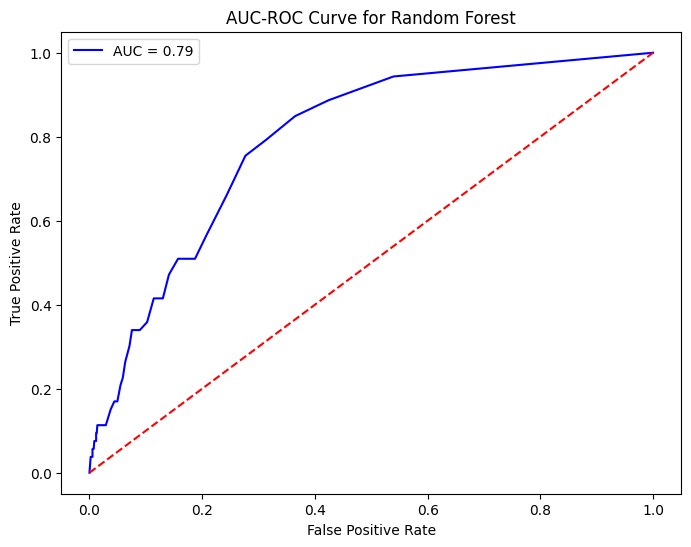

In [26]:
# Compute AUC-ROC for the best model
y_probs = best_model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1
auc_score = roc_auc_score(y_test, y_probs)
fpr, tpr, _ = roc_curve(y_test, y_probs)

# Plot the AUC-ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], color='red', linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"AUC-ROC Curve for {best_model_name}")
plt.legend()
plt.show()


The **AUC-ROC Curve** shown in the image evaluates the performance of a **Random Forest classifier** in distinguishing between two classes, such as identifying individuals at high risk of stroke. The **X-axis** represents the **False Positive Rate (FPR)**, which measures the proportion of actual negatives incorrectly classified as positives, while the **Y-axis** represents the **True Positive Rate (TPR)**, which indicates the proportion of actual positives correctly classified. The blue curve represents the model’s performance across different classification thresholds, while the red dashed diagonal line represents a **random guessing classifier** (AUC = 0.5). A model with an AUC close to **1.0** is highly effective, while a score of **0.5** indicates no predictive power. In this case, the AUC value is **0.78**, meaning the Random Forest model has a **78% chance** of correctly ranking a randomly chosen positive case higher than a randomly chosen negative case. This suggests that the model performs **better than random guessing** and has a **moderate level of predictive accuracy**.

## Save the best model


In [27]:
import joblib
joblib.dump(best_model, "best_model.pkl")
print(f"Best Model: {best_model_name} with Accuracy: {best_accuracy:.2f}")


Best Model: Random Forest with Accuracy: 94.60


## Load the Best Model & Make Predictions

In [28]:
import joblib
import numpy as np

# Load the best saved model
best_model = joblib.load("/content/best_model.pkl")

# Define feature names
feature_names = [
    "Age", "Hypertension", "Avg Glucose Level", "Heart Disease",
    "Ever Married", "Smoking Status", "BMI", "Residence Type",
    "Gender", "Work Type"
]

# Collect user inputs from the command line
user_data = []
for feature in feature_names:
    value = input(f"Enter {feature}: ")
    user_data.append(float(value))  # Convert input to float

# Convert input to numpy array
user_input = np.array([user_data])

# Make prediction
prediction = best_model.predict(user_input)

# Display result
if prediction[0] == 1:
    print("\n⚠️ High Risk of Stroke! Please consult a doctor. ❤️")
else:
    happy_quotes = [
        "Stay positive, work hard, and make it happen!",
        "Happiness is not something ready-made. It comes from your own actions. 🌟",
        "Take care of your body. It’s the only place you have to live. 💪",
        "The greatest wealth is health. Keep shining! ✨",
        "Every day is a new beginning. Take a deep breath and start again! 🍀"
    ]
    import random
    print(f"\n✅ No Immediate Risk! Stay healthy! 😊\n💡 {random.choice(happy_quotes)}")


Enter Age: 67
Enter Hypertension: 1
Enter Avg Glucose Level: 229
Enter Heart Disease: 1
Enter Ever Married: 1
Enter Smoking Status: 1
Enter BMI: 37
Enter Residence Type: 1
Enter Gender: 0
Enter Work Type: 2

✅ No Immediate Risk! Stay healthy! 😊
💡 Stay positive, work hard, and make it happen!
